In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime


/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [2]:
nameCSV = 'innis_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2662

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2394


In [4]:
days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Make ndarray(alltime) and list(days2) that has dates

In [5]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [6]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.1770000457763667 1985-03-31 08:13:46.832721
0.29100000858306885 1985-04-05 21:26:15.503909
2.1640000343322754 1985-04-08 21:35:06.187500
1.579800009727478 1985-04-23 09:53:29.146876
2.3106002807617188 1985-05-16 11:33:14.298438
0.4826667308807373 1985-07-30 16:49:35.815105
1.2717777490615845 1985-08-22 18:29:05.607639
0.4731818437576294 1985-09-14 20:08:44.546877
0.4109000265598297 1985-09-23 09:29:54.689844
2.001000165939331 1985-10-07 21:48:02.343750
1.241000056266785 1985-10-30 23:27:24.464844
1.731545329093933 1985-11-02 23:36:09.269886
1.1175554990768433 1985-11-08 12:48:30.101562
0.5516666769981384 1985-11-26 01:15:21.096897
0.7686000466346741 1986-01-11 04:33:36.420703
0.6541999578475952 1986-01-19 17:54:59.206250
1.075285792350769 1986-02-03 06:12:35.508371
1.744444489479065 1986-03-01 08:00:17.441840
2.001062393188477 1986-03-24 09:39:13.101562
2.3270528316497803 1986-04-16 11:18:06.899671
0.5181428790092468 1986-05-09 12:56:55.488838
2.768230676651001 1986-06-01 14:35:32.74

1.7490588426589966 1997-01-05 05:54:18.798109
2.289058923721313 1997-01-13 15:08:32.683594
1.1521579027175903 1997-01-14 12:49:47.894531
2.517263412475586 1997-01-15 03:52:50.493010
1.595000147819519 1997-01-17 00:30:49.069436
1.5476667881011963 1997-01-25 01:51:22.422217
5.654118061065674 1997-02-02 05:36:04.800031
2.78378963470459 1997-02-02 11:05:36.129112
1.9014209508895876 1997-02-03 23:49:54.032894
2.2831251621246342 1997-02-12 09:04:17.132810
0.7462143301963806 1997-02-18 12:49:47.517464
1.5221766233444214 1997-02-21 00:30:49.257468
1.202210545539856 1997-02-22 07:02:40.089228
0.9596999287605286 1997-02-23 19:46:58.236020
2.0643529891967773 1997-03-04 05:01:08.503195
1.9142857789993288 1997-03-05 17:45:30.676215
2.203937530517578 1997-03-09 00:27:57.287942
2.625600099563598 1997-03-14 02:59:43.440892
2.317631721496582 1997-03-15 15:44:00.970395
2.585764646530152 1997-03-24 00:58:20.965272
1.900889039039612 1997-03-25 12:49:49.328124
2.262158155441284 1997-03-25 13:42:32.430147
1

2.2370624542236333 2005-07-09 23:58:09.230208
2.393273115158081 2005-07-10 12:22:50.340910
0.4573000371456146 2005-07-18 19:25:39.506699
1.7117999792099 2005-07-26 12:19:57.842189
1.3223999738693235 2005-07-29 00:00:59.231300
2.2054002285003658 2005-08-04 20:38:26.915626
1.2161333560943604 2005-08-13 23:58:03.903126
1.7227998971939087 2005-08-14 12:22:45.390626
1.8014665842056277 2005-08-21 21:51:15.593748
1.991727352142334 2005-08-30 12:19:53.964845
1.5964287519454956 2005-09-02 00:00:55.279099
1.0659375190734863 2005-09-07 23:04:05.677086
2.164928674697876 2005-09-17 23:58:02.883929
1.704142928123474 2005-09-18 12:22:44.556249
0.5398000478744507 2005-09-25 00:16:53.214029
2.3951666355133057 2005-10-04 12:19:54.158854
1.7498637437820437 2005-10-07 00:00:56.004601
1.0847142934799194 2005-10-12 01:29:39.031251
1.2299333810806274 2005-10-22 23:58:06.531250
0.9013636112213136 2005-10-23 12:22:46.549717
2.1507999897003174 2005-10-29 02:42:23.402623
1.1954667568206787 2005-11-08 12:19:55.92

2.7718097141810825 2011-12-10 07:39:16.091406
2.1260002983940973 2011-12-11 01:51:00.885634
2.9813501358032233 2011-12-11 20:23:34.445684
2.3767620268322167 2011-12-20 05:37:47.574805
1.4390501976013184 2011-12-21 18:22:05.835937
1.0927000999450684 2011-12-30 03:36:20.145899
1.4632354063146256 2011-12-31 16:20:38.628124
2.5907779269748263 2012-01-01 12:50:32.453992
2.2503498077392576 2012-01-07 00:28:37.746555
2.5782001495361326 2012-01-09 01:34:52.236377
2.2844119352452896 2012-01-10 14:19:10.624219
2.253350257873535 2012-01-11 02:09:53.932466
1.9694000244140624 2012-01-18 23:33:24.326562
0.4786999702453613 2012-01-20 12:17:42.382422
0.7613000392913818 2012-01-28 21:31:55.689844
1.4727647444781136 2012-01-30 10:16:13.728516
0.687399959564209 2012-01-30 11:25:36.682904
0.9513999938964844 2012-02-04 23:03:35.670955
1.9272998809814448 2012-02-07 19:30:27.222656
3.549700164794922 2012-02-09 08:14:44.600001
2.3613000869750977 2012-02-10 05:03:05.013040
1.903750228881836 2012-02-17 22:16:27

3.1687503814697267 2016-06-04 04:46:04.693014
2.57345027923584 2016-06-09 16:24:04.726563
1.2662500143051147 2016-06-10 23:59:58.499998
0.9575501441955566 2016-06-11 00:00:07
1.434500026702881 2016-06-12 07:34:43.845312
0.9557856832231794 2016-06-12 07:36:04.671875
1.174375057220459 2016-06-13 20:19:02.550000
0.7162353291231043 2016-06-13 20:20:22.906250
0.7533000946044922 2016-06-19 12:20:14
0.7560000419616699 2016-06-22 05:33:15.656836
0.5809524172828311 2016-06-22 05:34:37.039648
0.7666500568389892 2016-06-23 18:17:34.264843
1.6775236583891369 2016-06-23 18:18:55.501562
0.7975001335144043 2016-07-01 03:23:33.525065
1.1394500732421875 2016-07-02 06:52:10.003552
0.8180000080781824 2016-07-02 14:02:55.389789
0.3633333524068197 2016-07-03 16:16:06.460070
0.5963889757792155 2016-07-03 16:17:31.361779
0.7477500438690186 2016-07-06 15:01:32.499080
0.6685293912887573 2016-07-07 23:59:58.999995
0.7196500301361084 2016-07-08 00:00:07.500000
0.4909474222283614 2016-07-08 14:58:58.531253
1.4070

In [58]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2394


/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [8]:
days2

[datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
 datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
 datetime.datetime(1985, 4, 8, 21, 35, 6, 187500),
 datetime.datetime(1985, 4, 23, 9, 53, 29, 146876),
 datetime.datetime(1985, 5, 16, 11, 33, 14, 298438),
 datetime.datetime(1985, 7, 30, 16, 49, 35, 815105),
 datetime.datetime(1985, 8, 22, 18, 29, 5, 607639),
 datetime.datetime(1985, 9, 14, 20, 8, 44, 546877),
 datetime.datetime(1985, 9, 23, 9, 29, 54, 689844),
 datetime.datetime(1985, 10, 7, 21, 48, 2, 343750),
 datetime.datetime(1985, 10, 30, 23, 27, 24, 464844),
 datetime.datetime(1985, 11, 2, 23, 36, 9, 269886),
 datetime.datetime(1985, 11, 8, 12, 48, 30, 101562),
 datetime.datetime(1985, 11, 26, 1, 15, 21, 96897),
 datetime.datetime(1986, 1, 11, 4, 33, 36, 420703),
 datetime.datetime(1986, 1, 19, 17, 54, 59, 206250),
 datetime.datetime(1986, 2, 3, 6, 12, 35, 508371),
 datetime.datetime(1986, 3, 1, 8, 0, 17, 441840),
 datetime.datetime(1986, 3, 24, 9, 39, 13, 101562),
 datetime.

In [9]:
alltime

array([datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
       datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
       datetime.datetime(1985, 4, 8, 21, 35, 6, 187500), ...,
       datetime.datetime(2019, 2, 9, 1, 11, 43, 638834),
       datetime.datetime(2019, 2, 10, 13, 55, 59, 960156),
       datetime.datetime(2019, 2, 18, 23, 10, 14, 196875)], dtype=object)

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [10]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [11]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[7.21842117 3.84835449 6.06049484 ... 5.92469211 6.59358157 5.14627429]
2662 2662


In [13]:

days2wh = wh[days]
days2T = T[days]

#print len(days2wh)#print len(days2T)

In [14]:
len(days2wh)
len(days2T)

2394

In [15]:
df = pd.DataFrame(data={"date": days2, "wh":days2wh, "T":days2T })
df.to_csv("./innis_timeseries_df.csv", sep=',',index=False)

In [16]:
df

,T,date,wh
0,7.218421,1985-03-31 08:13:46.832721,2.177000
1,3.848354,1985-04-05 21:26:15.503909,0.291000
2,6.060495,1985-04-08 21:35:06.187500,2.164000
3,4.812704,1985-04-23 09:53:29.146876,1.579800
4,5.343270,1985-05-16 11:33:14.298438,2.310600
5,4.298772,1985-07-30 16:49:35.815105,0.482667
6,6.605341,1985-08-22 18:29:05.607639,1.271778
7,3.655896,1985-09-14 20:08:44.546877,0.473182
8,3.871910,1985-09-23 09:29:54.689844,0.410900
9,5.364824,1985-10-07 21:48:02.343750,2.001000


In [17]:
days2[0].month

3

In [18]:
print len(df.wh)
print len(df.date)

2394
2394


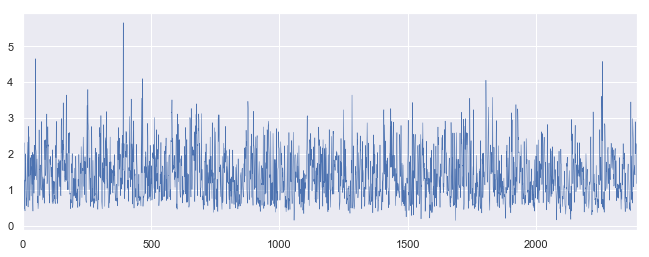

In [19]:
sns.set(rc={'figure.figsize':(11, 4)})


df['wh'].plot(linewidth=0.5)
df['date'].plot

## Get rolling average wh based on 30 Days

In [20]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [21]:
yrolling

,T,date,wh
0,7.218421,1985-03-31 08:13:46.832721,2.177000
1,5.533388,1985-04-05 21:26:15.503909,1.234000
2,5.709090,1985-04-08 21:35:06.187500,1.544000
3,5.484994,1985-04-23 09:53:29.146876,1.552950
4,5.077987,1985-05-16 11:33:14.298438,1.945200
5,4.298772,1985-07-30 16:49:35.815105,0.482667
6,5.452057,1985-08-22 18:29:05.607639,0.877222
7,5.130619,1985-09-14 20:08:44.546877,0.872480
8,3.763903,1985-09-23 09:29:54.689844,0.442041
9,4.297543,1985-10-07 21:48:02.343750,0.961694


In [22]:
yy=yrolling['wh']

tt=yrolling['T']

In [23]:
tt

0       7.218421
1       5.533388
2       5.709090
3       5.484994
4       5.077987
5       4.298772
6       5.452057
7       5.130619
8       3.763903
9       4.297543
10      4.922468
11      4.936598
12      4.866883
13      4.532495
14      6.388519
15      5.484003
16      5.304931
17      5.415131
18      5.672275
19      5.711648
20      4.894235
21      4.783511
22      5.467341
23      5.299276
24      5.864396
25      5.722930
26      5.155076
27      4.213162
28      5.116427
29      6.258021
          ...   
2364    4.759233
2365    4.741180
2366    4.740073
2367    4.788256
2368    4.821506
2369    4.906215
2370    4.956869
2371    4.987830
2372    4.965406
2373    4.988010
2374    5.024241
2375    5.011607
2376    4.980042
2377    5.081189
2378    5.199184
2379    5.349288
2380    5.414072
2381    5.231887
2382    5.174032
2383    5.166876
2384    5.154142
2385    5.181934
2386    5.250714
2387    5.177550
2388    5.069198
2389    4.965446
2390    5.170496
2391    5.2390

## Incorporate rolling average wh into dataframe

In [24]:
len(days2T)

2394

In [25]:
df = pd.DataFrame(data={"date": days2, "wh":days2wh, "whrolling":yy, "Time7":days2T, "trolling":tt })
df.to_csv("./innis_timeseries_df.csv", sep=',',index=False)

In [26]:
df

,Time7,date,trolling,wh,whrolling
0,7.218421,1985-03-31 08:13:46.832721,7.218421,2.177000,2.177000
1,3.848354,1985-04-05 21:26:15.503909,5.533388,0.291000,1.234000
2,6.060495,1985-04-08 21:35:06.187500,5.709090,2.164000,1.544000
3,4.812704,1985-04-23 09:53:29.146876,5.484994,1.579800,1.552950
4,5.343270,1985-05-16 11:33:14.298438,5.077987,2.310600,1.945200
5,4.298772,1985-07-30 16:49:35.815105,4.298772,0.482667,0.482667
6,6.605341,1985-08-22 18:29:05.607639,5.452057,1.271778,0.877222
7,3.655896,1985-09-14 20:08:44.546877,5.130619,0.473182,0.872480
8,3.871910,1985-09-23 09:29:54.689844,3.763903,0.410900,0.442041
9,5.364824,1985-10-07 21:48:02.343750,4.297543,2.001000,0.961694


## Calculate Wave Power

### Wave Energy Flux
$P = ECg$

### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$

## Split into two, either side of date gap

In [27]:
#find where to split
#1988-08-01 11:40:58.989583
#1992-10-21 07:43:04.942708
     

    
#Period    
time1 = df.Time7[0:52]
time2 = df.Time7[53:-1]

#Period rolling
tt1 = df.trolling[0:52]
tt2 = df.trolling[53:-1]
        


#Hs normal
y1 = df.wh[0:52]
y2 = df.wh[53:-1]

#Hs rolling
yy1 = df.whrolling[0:52]
yy2 = df.whrolling[53:-1]


#Date
x1=df.date[0:52]
x2 = df.date[53:-1]

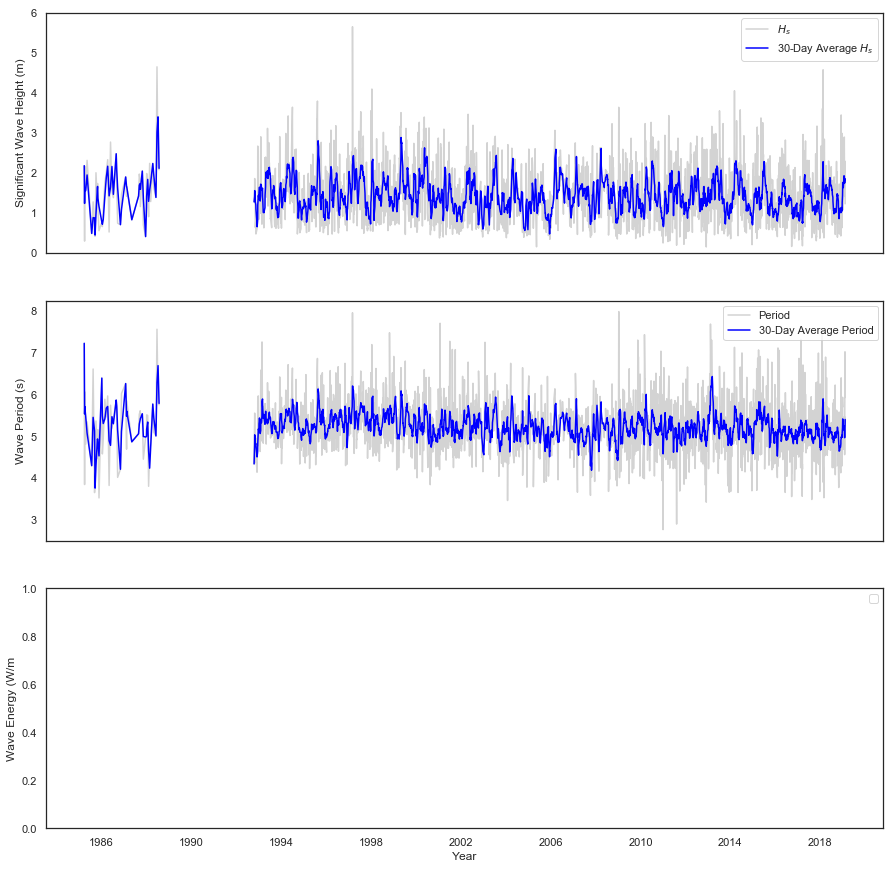

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    

ax

sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
#ax3.plot(x1, time1)
#ax3.plot(x1,tt1)

#After date break
#ax3.plot(x2,time2)
#ax3.plot(x2,tt2)

ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (W/m") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')


In [ ]:
from __future__ import print_function
import matplotlib.cbook as cbook
from matplotlib.dates import bytespdate2num, num2date
from matplotlib.ticker import Formatter

class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return num2date(self.dates[ind]).strftime(self.fmt)

    
formatter = MyFormatter('df.date')

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
#ax.plot(np.arange(len(msft_data)), msft_data['Close'], 'o-')    
#plt.xaxis.set_major_formatter(formatter)
fig.autofmt_xdate()
  
    
sns.set_style("white")

#Before date break
plt.plot(x1,y1,color='lightgrey',label="$H_s$")
plt.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
plt.plot(x2,y2,color='lightgrey', label='False')
plt.plot(x2,yy2,color='blue')


#Formatting
plt.title("Innisfail 30 Day Moving Average Significant Wave Height")
plt.xlabel("Year")
plt.ylabel("Significant Wave Height (m)")
plt.ylim(0,6)

plt.legend(labels=["$H_s$","30-Day Average $H_s$"])

In [ ]:
from __future__ import print_function

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.dates import bytespdate2num, num2date
from matplotlib.ticker import Formatter


#datafile = cbook.get_sample_data('msft.csv', asfileobj=False)
#print('loading %s' % datafile)
msft_data = (x1,y1)


class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return num2date(self.dates[ind]).strftime(self.fmt)

formatter = MyFormatter(msft_data['Date'])

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.plot(np.arange(len(msft_data)), msft_data['Close'], 'o-')
fig.autofmt_xdate()
plt.show()

In [ ]:
sns.lmplot(x='date',y='wh', data=df, fit_reg=False)

plt.ylim(0,6)
#plt.xlim(0, None)

In [ ]:
sns.set()
sns.set_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":8, "ytick.major.size":8})
#sns.axes_style("whitegrid") 

sns.stripplot(x="Date",y="wh")

In [ ]:
# df = pd.DataFrame(np.asarray(wh), columns=['wh'])
# df['Date'] = netCDF4.num2date(tt,u'days since 1985-01-01 00:00:00 UTC')
# df

In [ ]:
print len(df.wh)
print len(df.DATETIME)

In [ ]:
# # Import required python packages
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.dates import DateFormatter
# import matplotlib.dates as mdates
# import seaborn as sns
# #import earthpy as et

# # Date time conversion registration
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# # Get the data
# data = df

# #os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# # Prettier plotting with seaborn
# sns.set(font_scale=1.5, style="whitegrid")
# plt.
# plt.scatter(dates,wh)
# plt.set(xlabel="Date", ylabel="Wave Height")
# plt.show()




sns.set(rc={'figure.figsize':(11, 4)})


df['wh'].plot(linewidth=0.5)
df['DATETIME'].plot

In [ ]:
sns.tsplot(df.wh, time="df.DATETIME")
plt.show()

In [ ]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(16,8))
plt.plot(x,y)


In [ ]:
yrolling = data.rolling('30D', on = 'Date', min_periods = 1).mean()

In [ ]:
yrolling

In [ ]:
yy = yrolling['wh']

In [ ]:
yy

In [ ]:
sns.set_style("white")

plt.plot(x,y,color='lightgrey',label="$H_s$")
plt.plot(x,yy,color='blue', linewidth=1, label="30-Day Average $H_s$")
plt.legend(loc='upper right')
plt.title("Innisfail 30 Day Moving Average Significant Wave Height")
plt.xlabel("Year")
plt.ylabel("Significant Wave Height (m)")


plt.ylim(0,6)
#plt.xlim(1985, 2020)
# ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

date_ticks = range(0, len(DATETIME), 5)


ax.set_xticks(date_ticks);
ax.set_xticklabels([DATETIME[i].strftime('%d %b') for i in date_ticks], rotation='vertical');
ax.set_xlabel('Date');

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

def rolling_mean(data, window, min_periods=1, center=False):
    ''' Function that computes a rolling mean

    Parameters
    ----------
    data : DataFrame or Series
           If a DataFrame is passed, the rolling_mean is computed for all columns.
    window : int or string
             If int is passed, window is the number of observations used for calculating 
             the statistic, as defined by the function pd.rolling_mean()
             If a string is passed, it must be a frequency string, e.g. '90S'. This is
             internally converted into a DateOffset object, representing the window size.
    min_periods : int
                  Minimum number of observations in window required to have a value.

    Returns
    -------
    Series or DataFrame, if more than one column    
    '''
    def f(x):
        '''Function to apply that actually computes the rolling mean'''
        if center == False:
            dslice = col[x-pd.datetools.to_offset(window).delta+timedelta(0,0,1):x]
                # adding a microsecond because when slicing with labels start and endpoint
                # are inclusive
        else:
            dslice = col[x-pd.datetools.to_offset(window).delta/2+timedelta(0,0,1):
                         x+pd.datetools.to_offset(window).delta/2]
        if dslice.size < min_periods:
            return np.nan
        else:
            return dslice.mean()

    data = df
    dfout = DataFrame()
    if isinstance(window, int):
        dfout = pd.rolling_mean(data, window, min_periods=min_periods, center=center)
    elif isinstance(window, basestring):
        idx = Series(data.index.to_pydatetime(), index=data.index)
        for colname, col in data.iterkv():
            result = idx.apply(f)
            result.name = colname
            dfout = dfout.join(result, how='outer')
    if dfout.columns.size == 1:
        dfout = dfout.ix[:,0]
    return dfout


In [ ]:
idx = [datetime(2011, 2, 7, 0, 0),
       datetime(2011, 2, 7, 0, 1),
       datetime(2011, 2, 7, 0, 1, 30),
       datetime(2011, 2, 7, 0, 2),
       datetime(2011, 2, 7, 0, 4),
       datetime(2011, 2, 7, 0, 5),
       datetime(2011, 2, 7, 0, 5, 10),
       datetime(2011, 2, 7, 0, 6),
       datetime(2011, 2, 7, 0, 8),
       datetime(2011, 2, 7, 0, 9)]
idx = pd.Index(idx)
vals = np.arange(len(idx)).astype(float)
s = Series(vals, index=idx)
rm = rolling_mean(s, window='2min')

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.setrc={'figure.figsize':(11, 4)}

x_dates = df['12monthsEnding'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [ ]:
for k in range(len(tt)):
    print netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')

## Linear Regression

In [ ]:
months5 = [january, february, march, april, may, june, july, august, september, october, november, december]
overall


In [ ]:
months5

In [ ]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(overall, months)

In [ ]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [ ]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [ ]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

In [ ]:
T.min()

In [ ]:
print len(T), len(wh)

In [ ]:
netCDF4.num2date(tt[0],u'days since 1985-01-01 00:00:00 UTC').month

In [ ]:
for k in range(len(days)):
    if netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC').month == 1:
        print wh[k], netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')

In [ ]:
jan

In [ ]:
#print netCDF4.num2date(jan,u'days since 1985-01-01 00:00:00 UTC')

In [ ]:
len(jan)+len(feb)+len(mar)+len(apr)+len(may)+len(jun)+len(jul)+len(aug)+len(sep)+len(octo)+len(nov)+len(dec)

In [ ]:
stats.describe(marTp)

In [ ]:
for k in range(len(days)):
    print marTp[days[k]], netCDF4.num2date(martime[days[k]],u'days since 1985-01-01 00:00:00 UTC')

In [ ]:
marTp

In [ ]:
print 'Month    Min             Max             Mean'
print 'Jan', min(janTp), max(janTp), np.mean(janTp())#.mean(), stats.sem(janTp)
print 'Feb', min(febTp), max(febTp)#,# febTp.mean(), stats.sem(febTp)
print 'Mar', min(marTp), max(marTp)#,# marTp.mean(), stats.sem(marTp)
print 'Apr', min(aprTp), max(aprTp)#,# aprTp.mean(), stats.sem(aprTp)
print 'May', min(mayTp), max(mayTp)#,# mayTp.mean(), stats.sem(mayTp)
print 'Jun', min(junTp), max(junTp)#,# junTp.mean(), stats.sem(junTp)
print 'Jul', min(julTp), max(julTp)#,# julTp.mean(), stats.sem(julTp)
print 'Aug', min(augTp), max(augTp)#,# augTp.mean(), stats.sem(augTp)
print 'Sep', min(sepTp), max(sepTp)#,# sepTp.mean(), stats.sem(sepTp)
print 'Oct', min(octTp), max(octTp)#,# octTp.mean(), stats.sem(octTp)
print 'Nov', min(novTp), max(novTp)#,# novTp.mean(), stats.sem(novTp)
print 'Dec', min(decTp), max(decTp)#,# decTp.mean(), stats.sem(decTp)

In [ ]:
overall = [
np.mean(janTp),
np.mean(febTp),
np.mean(marTp),
np.mean(aprTp),
np.mean(mayTp),
np.mean(junTp),
np.mean(julTp),
np.mean(augTp),
np.mean(sepTp),
np.mean(octTp),
np.mean(novTp),
np.mean(decTp)]


label = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec']

stdev = [
np.std(janTp),
np.std(febTp),
np.std(marTp),
np.std(aprTp),
np.std(mayTp),
np.std(junTp),
np.std(julTp),
np.std(augTp),
np.std(sepTp),
np.std(octTp),
np.std(novTp),
np.std(decTp)]

In [ ]:
janTp.mean

## Plot data

In [ ]:
index = np.arange(len(label))
plt.bar(index, overall)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Innisfail 33 year Significant Wave Height')
plt.show()

In [ ]:
# Get some parameters for the Stereographic Projection
lon_0 = lon1.mean()
lat_0 = lat1.mean()


# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)


In [ ]:
lon = x
lat =y

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree(central_longitude=140))
ax.scatter(lon,lat)
ax.coastlines()
ax.stock_img()
ax.gridlines()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.AzimuthalEquidistant(central_longitude=to_lon,
                                                          central_latitude=to_lat))
# Here we add the transform argument and use the Geodetic projection.
ax.scatter(lon, lat, transform=ccrs.Geodetic())
ax.stock_img()
ax.coastlines()
ax.gridlines()

In [ ]:
# An arbitrary choice.
GBReast = 147
GBRwest = 148
GBRnorth = -17
GBRsouth = -18

standard_parallels = (49, 77)
central_longitude = -(91 + 52 / 60)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([GBRwest, GBReast, GBRsouth, GBRnorth])
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.OCEAN)

In [ ]:
# Get some parameters for the Stereographic Projection
lons =lon[days]
lats = lat[days]

lon_0 = lons.mean()
lat_0 = lats.mean()

In [ ]:



# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)


In [ ]:
#lat
lat1 =ncjt1.variables['LATITUDE'][:]
latj2 =ncjtwo2.variables['LATITUDE'][:]
latc2 =ncc2.variables['LATITUDE'][:]
latsa2 = ncs2.variables['LATITUDE'][:]
latse2 = ncse2.variables['LATITUDE'][:]

#long
lon1 = ncjt1.variables['LONGITUDE'][:]
lonj2 =ncjtwo2.variables['LONGITUDE'][:]
lonc2 =ncc2.variables['LONGITUDE'][:]
lons2 =ncs2.variables['LONGITUDE'][:]
lonse2= ncse2.variables['LONGITUDE'][:]

# Get some parameters for the Stereographic Projection
lon_0 = lon.mean()
lat_0 = lat.mean()


# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)
